In [17]:
import numpy as np
from qiskit import *
from qiskit.transpiler import PassManager, preset_passmanagers
from qiskit.transpiler.passes.optimization import TemplateOptimization, Collect2qBlocks, CollectMultiQBlocks
from qiskit.transpiler.passes.optimization.template_matching import *
from qiskit.converters import circuit_to_dag, circuit_to_dagdependency, dagdependency_to_circuit, dagdependency_to_dag
from qiskit.visualization import dag_drawer
from qiskit.quantum_info import Operator
import os
from qiskit import QuantumCircuit

In [18]:
# templates = []
# dir = "/Users/christiangrauberger/Library/CloudStorage/OneDrive-Personal/Research/ThreeQBReducedMatches"

# for file in os.listdir(dir):
#     filename = os.fsdecode(file)
#     if filename.endswith('.txt'):
#         file_path = os.path.join(dir, filename)
#         templates.append(QuantumCircuit.from_qasm_file(file_path))

In [19]:
qreg_q = QuantumRegister(3, 'q')

template = QuantumCircuit(qreg_q)

template.x(qreg_q[0])
template.x(qreg_q[1])
template.x(qreg_q[2])
template.cx(qreg_q[0], qreg_q[1])
template.x(qreg_q[0])
template.cx(qreg_q[2], qreg_q[1])

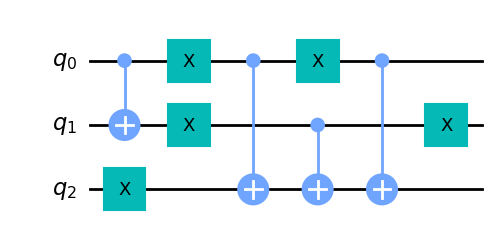

In [20]:
circ1 = QuantumCircuit(3)

circ1.cx(0, 1)
circ1.x(2)

circ1.x(0)
circ1.x(1)

circ1.cx(0, 2)

circ1.x(0)

circ1.cx(1, 2)

circ1.cx(0, 2)
circ1.x(1)

circ1.draw('mpl')


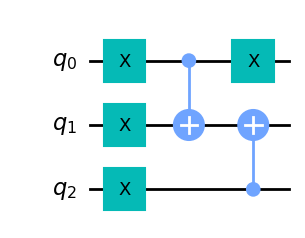

In [21]:
template.draw('mpl')

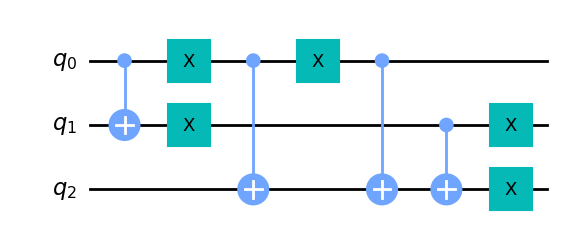

In [22]:
dag1 = circuit_to_dagdependency(circ1)
circ = dagdependency_to_circuit(dag1)
circ.draw('mpl')


[[0, 2], [1, 1], [2, 3], [3, 4], [4, 5], [5, 6]]

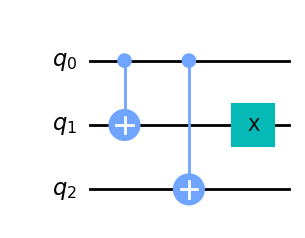

In [25]:
template_dag = circuit_to_dagdependency(template)
dag1 = circuit_to_dagdependency(circ1)

pass_ = TemplateMatching(circuit_dag_dep=dag1, template_dag_dep=template_dag)
pass_.run_template_matching()
matches = pass_.match_list
display(matches[0].match)


maximal = MaximalMatches(matches)
maximal.run_maximal_matches()
max_matches = maximal.max_match_list
#display(max_matches)

#print(max_matches[0].match)

substitution = TemplateSubstitution(max_matches, pass_.circuit_dag_dep, pass_.template_dag_dep)
substitution.run_dag_opt()
circ_dag_dep = substitution.dag_dep_optimized
circ = dagdependency_to_circuit(circ_dag_dep)

circ.draw('mpl')